In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_demo = pd.read_csv('../data/raw/df_final_demo.csv')
df_exp_clients = pd.read_csv('../data/raw/df_final_experiment_clients.csv')
df_web_data1 = pd.read_csv('../data/raw/df_final_web_data_pt_1.csv')
df_web_data2 = pd.read_csv('../data/raw/df_final_web_data_pt_2.csv')

In [3]:
df_web_data = pd.concat([df_web_data1, df_web_data2])
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [4]:
df_final1 = pd.merge(df_web_data, df_exp_clients, how="left", on=["client_id", "client_id"])
df_final = pd.merge(df_final1, df_demo, how="left", on=["client_id", "client_id"])

In [5]:
test_group = df_final[df_final['Variation'] == 'Test']
control_group = df_final[df_final['Variation'] == 'Control']

In [6]:
test_group_sorted = test_group.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'])

control_group_sorted = control_group.sort_values(by=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'])

In [7]:
test_group_sorted.dropna(inplace=True)
test_group_sorted.reset_index(drop=True, inplace=True)

control_group_sorted.dropna(inplace=True)
control_group_sorted.reset_index(drop=True, inplace=True)

In [8]:
test_group_sorted

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,555,402506806_56087378777,637149525_38041617439_716659,confirm,2017-04-15 13:00:34,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
1,555,402506806_56087378777,637149525_38041617439_716659,start,2017-04-15 12:57:56,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
2,555,402506806_56087378777,637149525_38041617439_716659,step_1,2017-04-15 12:58:03,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
3,555,402506806_56087378777,637149525_38041617439_716659,step_2,2017-04-15 12:58:35,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
4,555,402506806_56087378777,637149525_38041617439_716659,step_3,2017-04-15 13:00:14,Test,3.0,46.0,29.5,U,2.0,25454.66,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177782,9999729,843385170_36953471821,493310979_9209676464_421146,start,2017-04-20 14:28:57,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0
177783,9999729,843385170_36953471821,493310979_9209676464_421146,step_1,2017-04-20 14:22:49,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0
177784,9999729,843385170_36953471821,493310979_9209676464_421146,step_2,2017-04-20 14:27:36,Test,10.0,124.0,31.0,F,3.0,107059.74,6.0,9.0
177785,9999832,145538019_54444341400,472154369_16714624241_585315,start,2017-05-16 16:46:03,Test,23.0,281.0,49.0,F,2.0,431887.61,1.0,4.0


In [9]:
control_group_sorted

,client_id,visitor_id,visit_id,process_step,date_time,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,1028,42237450_62128060588,557292053_87239438319_391157,start,2017-04-08 18:51:28,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
1,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:52:17,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
2,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:53:20,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
3,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 18:59:55,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
4,1028,42237450_62128060588,557292053_87239438319_391157,step_1,2017-04-08 19:00:15,Control,12.0,145.0,36.0,M,3.0,103520.22,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143403,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:28:00,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0
143404,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:30:25,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0
143405,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0
143406,9998346,292425655_16607136645,189177304_69869411700_783154,step_3,2017-03-29 15:37:28,Control,50.0,602.0,61.5,F,2.0,149881.38,6.0,9.0


In [10]:
df_id_test_group = test_group_sorted.drop_duplicates('client_id')
df_id_control_group = control_group_sorted.drop_duplicates('client_id')

In [11]:
df_id_test_group['gendr'].value_counts()

gendr
U    9266
M    8977
F    8716
X       2
Name: count, dtype: int64

In [12]:
df_id_control_group['gendr'].value_counts()

gendr
U    8014
M    7970
F    7542
Name: count, dtype: int64

In [13]:
df_id_test_group['num_accts'].value_counts()

num_accts
2.0    21310
3.0     4696
4.0      840
5.0       97
6.0       13
7.0        4
1.0        1
Name: count, dtype: int64

In [14]:
df_id_control_group['num_accts'].value_counts()

num_accts
2.0    18410
3.0     4251
4.0      745
5.0      108
6.0       10
7.0        2
Name: count, dtype: int64

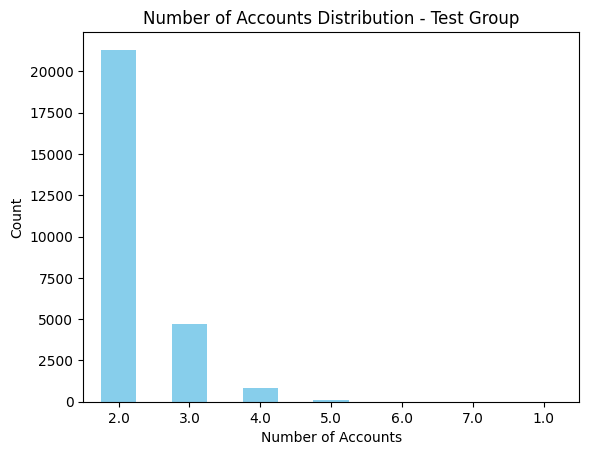

In [15]:
counts = df_id_test_group['num_accts'].value_counts()
counts.plot(kind='bar', color='skyblue') 
plt.title('Number of Accounts Distribution - Test Group')
plt.xlabel('Number of Accounts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

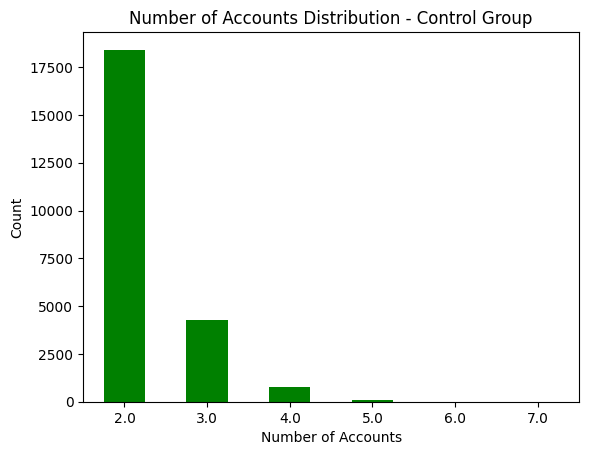

In [16]:
counts = df_id_control_group['num_accts'].value_counts()
counts.plot(kind='bar', color='green') 
plt.title('Number of Accounts Distribution - Control Group')
plt.xlabel('Number of Accounts')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [17]:
df_id_test_group['calls_6_mnth'].value_counts()

calls_6_mnth
6.0    6430
1.0    4316
0.0    4241
2.0    3763
3.0    3169
4.0    2586
5.0    2456
Name: count, dtype: int64

In [18]:
df_id_control_group['calls_6_mnth'].value_counts()

calls_6_mnth
6.0    5795
1.0    3592
0.0    3491
2.0    3452
3.0    2684
4.0    2261
5.0    2251
Name: count, dtype: int64

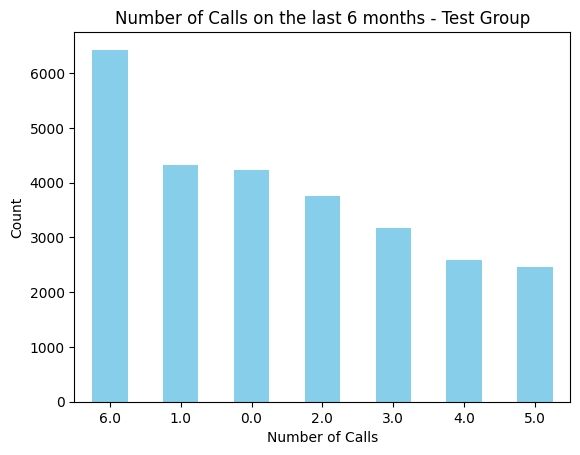

In [19]:
counts = df_id_test_group['calls_6_mnth'].value_counts()
counts.plot(kind='bar', color='skyblue') 
plt.title('Number of Calls on the last 6 months - Test Group')
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

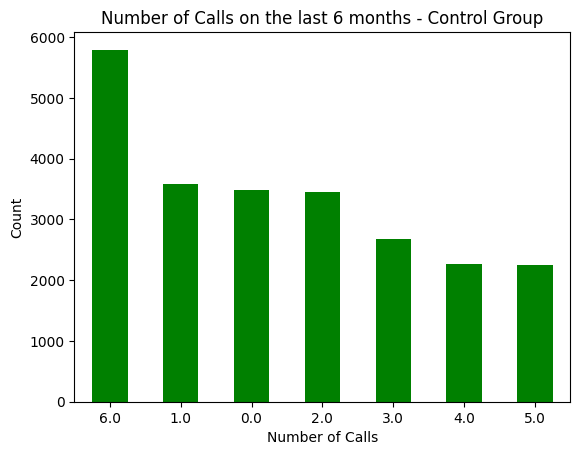

In [20]:
counts = df_id_control_group['calls_6_mnth'].value_counts()
counts.plot(kind='bar', color='green') 
plt.title('Number of Calls on the last 6 months - Control Group')
plt.xlabel('Number of Calls')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [21]:
df_id_test_group['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    6491
4.0    4302
3.0    3993
5.0    3803
6.0    3233
7.0    2619
8.0    2520
Name: count, dtype: int64

In [22]:
df_id_control_group['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    5859
4.0    3553
5.0    3480
3.0    3318
6.0    2732
7.0    2294
8.0    2290
Name: count, dtype: int64

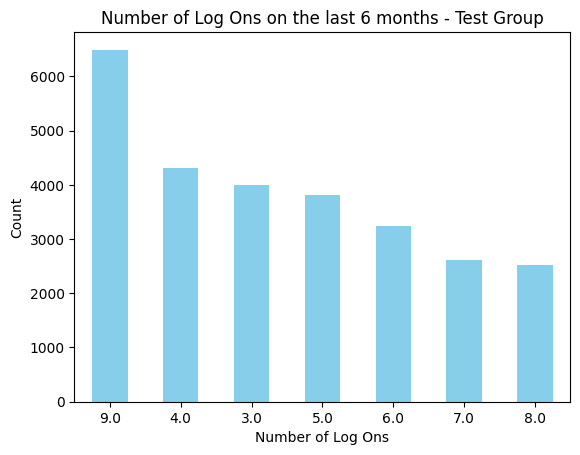

In [23]:
counts = df_id_test_group['logons_6_mnth'].value_counts()
counts.plot(kind='bar', color='skyblue') 
plt.title('Number of Log Ons on the last 6 months - Test Group')
plt.xlabel('Number of Log Ons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

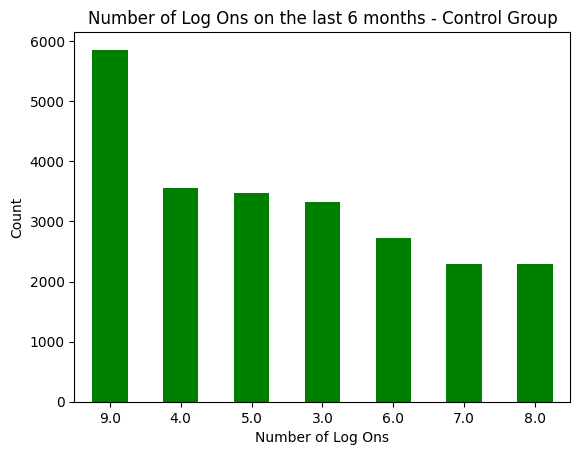

In [24]:
counts = df_id_control_group['logons_6_mnth'].value_counts()
counts.plot(kind='bar', color='green') 
plt.title('Number of Log Ons on the last 6 months - Control Group')
plt.xlabel('Number of Log Ons')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [25]:
frequency_table_test_group = df_id_test_group['clnt_age'].value_counts()
frequency_table_test_group

clnt_age
29.5    358
31.5    353
28.5    349
27.5    349
59.5    346
       ... 
17.0      1
96.0      1
95.5      1
93.0      1
94.5      1
Name: count, Length: 157, dtype: int64

In [26]:
frequency_table_control_group = df_id_control_group['clnt_age'].value_counts()
frequency_table_control_group

clnt_age
58.5    293
57.0    289
53.0    285
55.5    279
58.0    273
       ... 
94.0      1
90.5      1
92.5      1
91.5      1
96.0      1
Name: count, Length: 155, dtype: int64

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/1324070389.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot_test_group.set_xticklabels(my_plot_test_group.get_xticklabels(), rotation=90)


[Text(0, 0, '17.0'),
 Text(1, 0, '17.5'),
 Text(2, 0, '18.0'),
 Text(3, 0, '18.5'),
 Text(4, 0, '19.0'),
 Text(5, 0, '19.5'),
 Text(6, 0, '20.0'),
 Text(7, 0, '20.5'),
 Text(8, 0, '21.0'),
 Text(9, 0, '21.5'),
 Text(10, 0, '22.0'),
 Text(11, 0, '22.5'),
 Text(12, 0, '23.0'),
 Text(13, 0, '23.5'),
 Text(14, 0, '24.0'),
 Text(15, 0, '24.5'),
 Text(16, 0, '25.0'),
 Text(17, 0, '25.5'),
 Text(18, 0, '26.0'),
 Text(19, 0, '26.5'),
 Text(20, 0, '27.0'),
 Text(21, 0, '27.5'),
 Text(22, 0, '28.0'),
 Text(23, 0, '28.5'),
 Text(24, 0, '29.0'),
 Text(25, 0, '29.5'),
 Text(26, 0, '30.0'),
 Text(27, 0, '30.5'),
 Text(28, 0, '31.0'),
 Text(29, 0, '31.5'),
 Text(30, 0, '32.0'),
 Text(31, 0, '32.5'),
 Text(32, 0, '33.0'),
 Text(33, 0, '33.5'),
 Text(34, 0, '34.0'),
 Text(35, 0, '34.5'),
 Text(36, 0, '35.0'),
 Text(37, 0, '35.5'),
 Text(38, 0, '36.0'),
 Text(39, 0, '36.5'),
 Text(40, 0, '37.0'),
 Text(41, 0, '37.5'),
 Text(42, 0, '38.0'),
 Text(43, 0, '38.5'),
 Text(44, 0, '39.0'),
 Text(45, 0, '39.5')

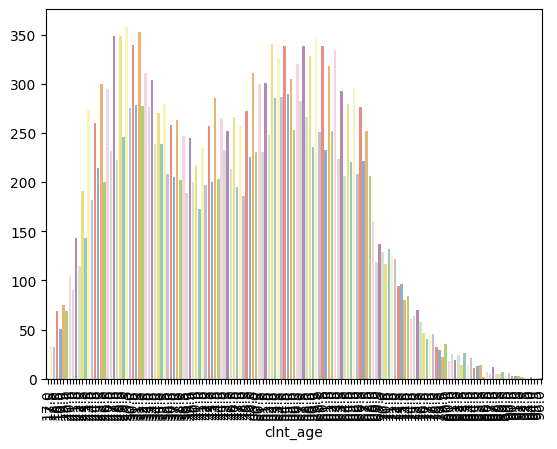

In [27]:
my_plot_test_group = sns.barplot(x=frequency_table_test_group.index, y=frequency_table_test_group.values, palette="Set3", 
                                 hue=frequency_table_test_group.index, legend=False)
my_plot_test_group.set_xticklabels(my_plot_test_group.get_xticklabels(), rotation=90)

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/2767637319.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  my_plot_control_group.set_xticklabels(my_plot_control_group.get_xticklabels(), rotation=90)


[Text(0, 0, '17.0'),
 Text(1, 0, '17.5'),
 Text(2, 0, '18.0'),
 Text(3, 0, '18.5'),
 Text(4, 0, '19.0'),
 Text(5, 0, '19.5'),
 Text(6, 0, '20.0'),
 Text(7, 0, '20.5'),
 Text(8, 0, '21.0'),
 Text(9, 0, '21.5'),
 Text(10, 0, '22.0'),
 Text(11, 0, '22.5'),
 Text(12, 0, '23.0'),
 Text(13, 0, '23.5'),
 Text(14, 0, '24.0'),
 Text(15, 0, '24.5'),
 Text(16, 0, '25.0'),
 Text(17, 0, '25.5'),
 Text(18, 0, '26.0'),
 Text(19, 0, '26.5'),
 Text(20, 0, '27.0'),
 Text(21, 0, '27.5'),
 Text(22, 0, '28.0'),
 Text(23, 0, '28.5'),
 Text(24, 0, '29.0'),
 Text(25, 0, '29.5'),
 Text(26, 0, '30.0'),
 Text(27, 0, '30.5'),
 Text(28, 0, '31.0'),
 Text(29, 0, '31.5'),
 Text(30, 0, '32.0'),
 Text(31, 0, '32.5'),
 Text(32, 0, '33.0'),
 Text(33, 0, '33.5'),
 Text(34, 0, '34.0'),
 Text(35, 0, '34.5'),
 Text(36, 0, '35.0'),
 Text(37, 0, '35.5'),
 Text(38, 0, '36.0'),
 Text(39, 0, '36.5'),
 Text(40, 0, '37.0'),
 Text(41, 0, '37.5'),
 Text(42, 0, '38.0'),
 Text(43, 0, '38.5'),
 Text(44, 0, '39.0'),
 Text(45, 0, '39.5')

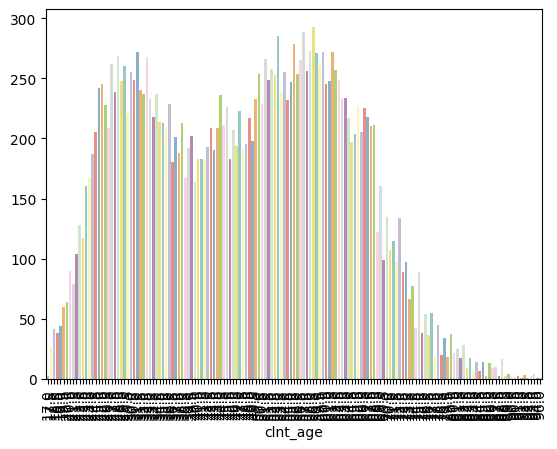

In [28]:
my_plot_control_group = sns.barplot(x=frequency_table_control_group.index, y=frequency_table_control_group.values, palette="Set3", 
                                    hue=frequency_table_control_group.index, legend=False)
my_plot_control_group.set_xticklabels(my_plot_control_group.get_xticklabels(), rotation=90)

In [29]:
mean_age_test_group = df_id_test_group['clnt_age'].mean()
median_age_test_group = df_id_test_group['clnt_age'].median()
mode_age_test_group = df_id_test_group['clnt_age'].mode()[0]

mean_age_test_group, median_age_test_group, mode_age_test_group

(47.16392196135158, 47.5, 29.5)

In [30]:
mean_age_control_group = df_id_control_group['clnt_age'].mean()
median_age_control_group = df_id_control_group['clnt_age'].median()
mode_age_control_group = df_id_control_group['clnt_age'].mode()[0]

mean_age_control_group, median_age_control_group, mode_age_control_group

(47.498427271954434, 48.5, 58.5)

In [31]:
variance_age_test_group = df_id_test_group['clnt_age'].var()
std_dev_age_test_group = df_id_test_group['clnt_age'].std()
min_age_test_group = df_id_test_group['clnt_age'].min()
max_age_test_group = df_id_test_group['clnt_age'].max()
range_age_test_group = max_age_test_group - min_age_test_group
quantiles_age_test_group = df_id_test_group['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age_test_group, std_dev_age_test_group, min_age_test_group, max_age_test_group, range_age_test_group, quantiles_age_test_group

(240.698490240794,
 15.514460681596185,
 17.0,
 96.0,
 79.0,
 0.25    33.5
 0.50    47.5
 0.75    59.5
 Name: clnt_age, dtype: float64)

In [32]:
variance_age_control_group = df_id_control_group['clnt_age'].var()
std_dev_age_control_group = df_id_control_group['clnt_age'].std()
min_age_control_group = df_id_control_group['clnt_age'].min()
max_age_control_group = df_id_control_group['clnt_age'].max()
range_age_control_group = max_age_control_group - min_age_control_group
quantiles_age_control_group = df_id_control_group['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age_control_group, std_dev_age_control_group, min_age_control_group, max_age_control_group, range_age_control_group, quantiles_age_control_group

(240.92569359443408,
 15.521781263580353,
 17.0,
 96.0,
 79.0,
 0.25    33.5
 0.50    48.5
 0.75    60.0
 Name: clnt_age, dtype: float64)

In [33]:
df_id_test_group.loc[df_id_test_group['clnt_age'] < 20, 'age_class'] = 'teen'
df_id_test_group.loc[(df_id_test_group['clnt_age'] >= 20) & (df_id_test_group['clnt_age'] < 60), 'age_class'] = 'adult'
df_id_test_group.loc[df_id_test_group['clnt_age'] >= 60, 'age_class'] = 'senior'

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/3140519077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_test_group.loc[df_id_test_group['clnt_age'] < 20, 'age_class'] = 'teen'


In [34]:
df_id_control_group.loc[df_id_control_group['clnt_age'] < 20, 'age_class'] = 'teen'
df_id_control_group.loc[(df_id_control_group['clnt_age'] >= 20) & (df_id_control_group['clnt_age'] < 60), 'age_class'] = 'adult'
df_id_control_group.loc[df_id_control_group['clnt_age'] >= 60, 'age_class'] = 'senior'

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/3136956780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_control_group.loc[df_id_control_group['clnt_age'] < 20, 'age_class'] = 'teen'


In [35]:
frequency_table_test_group1 = df_id_test_group['age_class'].value_counts()
frequency_table_test_group1

age_class
adult     20083
senior     6617
teen        261
Name: count, dtype: int64

In [36]:
frequency_table_control_group1 = df_id_control_group['age_class'].value_counts()
frequency_table_control_group1

age_class
adult     17374
senior     5941
teen        211
Name: count, dtype: int64

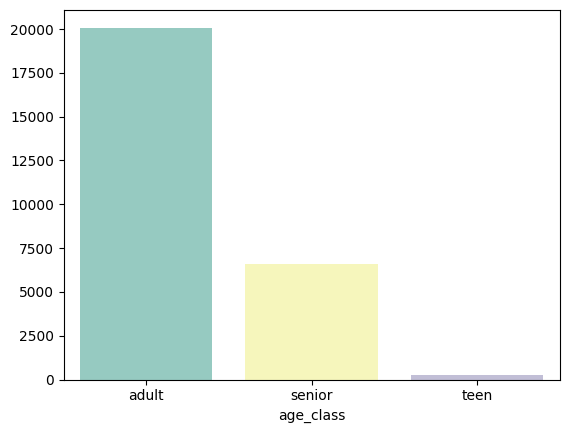

In [37]:
#Are the clients younger or older? Teen -> younger than 20 years old, adult -> from 20 up to 60, and senior from 60
my_plot_test_group1 = sns.barplot(x=frequency_table_test_group1.index, y=frequency_table_test_group1.values, palette="Set3", 
                                  hue=frequency_table_test_group1.index, legend=False)

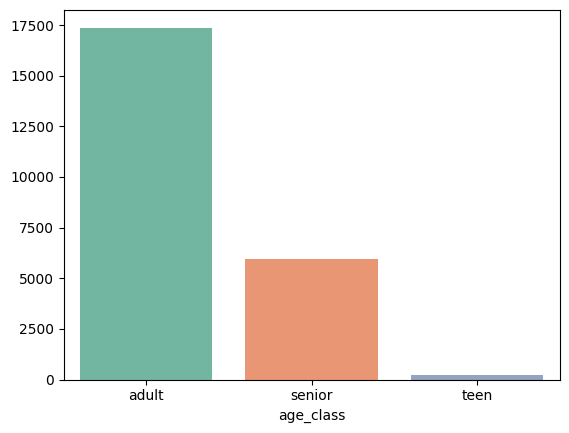

In [38]:
#Are the clients younger or older? Teen -> younger than 20 years old, adult -> from 20 up to 60, and senior from 60
my_plot_control_group1 = sns.barplot(x=frequency_table_control_group1.index, y=frequency_table_control_group1.values, palette="Set2", 
                                     hue=frequency_table_control_group1.index, legend=False)

In [39]:
frequency_table_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].value_counts()
frequency_table_tenure_yr_test_group

clnt_tenure_yr
5.0     2710
6.0     2644
7.0     1917
4.0     1825
15.0    1766
8.0     1614
14.0    1415
13.0    1391
12.0    1336
9.0     1271
10.0    1121
11.0    1061
16.0    1025
21.0     841
20.0     574
22.0     574
17.0     531
23.0     479
18.0     444
19.0     424
24.0     301
26.0     262
27.0     256
25.0     180
28.0     178
3.0      176
29.0     119
30.0     116
33.0      86
32.0      68
34.0      60
31.0      53
35.0      34
2.0       32
36.0      17
37.0      14
48.0       8
40.0       6
38.0       6
39.0       5
47.0       4
51.0       3
43.0       3
55.0       3
50.0       2
46.0       2
49.0       2
44.0       1
42.0       1
Name: count, dtype: int64

In [40]:
frequency_table_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].value_counts()
frequency_table_tenure_yr_control_group

clnt_tenure_yr
6.0     2419
5.0     2240
7.0     1655
4.0     1556
15.0    1512
8.0     1305
14.0    1225
12.0    1217
13.0    1195
9.0     1093
11.0     991
10.0     936
16.0     906
21.0     719
20.0     539
22.0     492
17.0     446
23.0     445
18.0     424
19.0     397
24.0     296
26.0     225
27.0     211
28.0     189
3.0      161
25.0     160
29.0     105
30.0     101
31.0      63
33.0      58
34.0      55
32.0      54
35.0      39
2.0       29
38.0      17
37.0      15
36.0      10
48.0       4
42.0       3
46.0       3
50.0       2
55.0       2
49.0       2
39.0       2
40.0       1
47.0       1
52.0       1
54.0       1
41.0       1
43.0       1
45.0       1
44.0       1
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '9.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '13.0'),
  Text(12, 0, '14.0'),
  Text(13, 0, '15.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0'),
  Text(17, 0, '19.0'),
  Text(18, 0, '20.0'),
  Text(19, 0, '21.0'),
  Text(20, 0, '22.0'),
  Text(21, 0, '23.0'),
  Text(22, 0, '24.0'),
  Text(23, 0, '25.0'),
  Text(24, 0, '26.0'),
  Text(25, 0, '27.0'),
  Text(26, 0, '28.0'),
  Text(27, 0, '29.0'),
  Text(28, 0, '30.0'),
  Text(29, 0, '31.0'),
  Text(30, 0, '32.0'),
  Text(31, 0, '33.0'

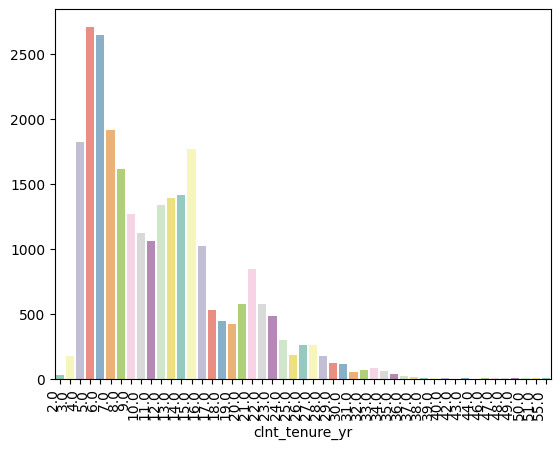

In [41]:
sns.barplot(x=frequency_table_tenure_yr_test_group.index, y=frequency_table_tenure_yr_test_group.values, palette="Set3", 
            hue=frequency_table_tenure_yr_test_group.index, legend=False)
plt.xticks(rotation=90, ha='right')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '5.0'),
  Text(4, 0, '6.0'),
  Text(5, 0, '7.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '9.0'),
  Text(8, 0, '10.0'),
  Text(9, 0, '11.0'),
  Text(10, 0, '12.0'),
  Text(11, 0, '13.0'),
  Text(12, 0, '14.0'),
  Text(13, 0, '15.0'),
  Text(14, 0, '16.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0'),
  Text(17, 0, '19.0'),
  Text(18, 0, '20.0'),
  Text(19, 0, '21.0'),
  Text(20, 0, '22.0'),
  Text(21, 0, '23.0'),
  Text(22, 0, '24.0'),
  Text(23, 0, '25.0'),
  Text(24, 0, '26.0'),
  Text(25, 0, '27.0'),
  Text(26, 0, '28.0'),
  Text(27, 0, '29.0'),
  Text(28, 0, '30.0'),
  Text(29, 0, '31.0'),
  Text(30, 0, '32.0'),
  

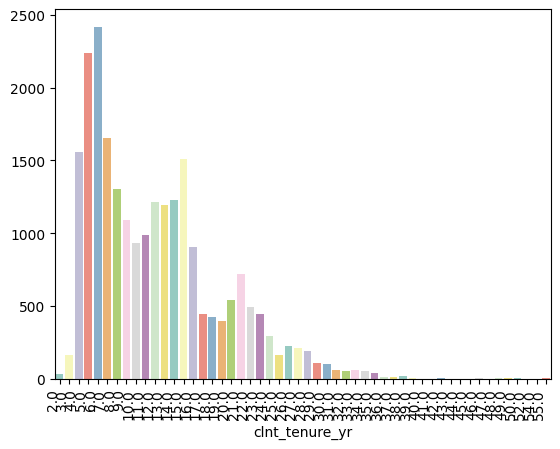

In [42]:
sns.barplot(x=frequency_table_tenure_yr_control_group.index, y=frequency_table_tenure_yr_control_group.values, palette="Set3", 
            hue=frequency_table_tenure_yr_control_group.index, legend=False)
plt.xticks(rotation=90, ha='right')

In [43]:
mean_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].mean()
median_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].median()
mode_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].mode()[0]

mean_tenure_yr_test_group, median_tenure_yr_test_group, mode_tenure_yr_test_group

(11.98290122769927, 11.0, 5.0)

In [44]:
mean_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].mean()
median_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].median()
mode_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].mode()[0]

mean_tenure_yr_control_group, median_tenure_yr_control_group, mode_tenure_yr_control_group

(12.087860239734761, 11.0, 6.0)

In [45]:
variance_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].var()
std_dev_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].std()
min_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].min()
max_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].max()
range_tenure_yr_test_group = max_tenure_yr_test_group - min_tenure_yr_test_group
quantiles_tenure_yr_test_group = df_id_test_group['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

variance_tenure_yr_test_group, std_dev_tenure_yr_test_group, min_tenure_yr_test_group, max_tenure_yr_test_group, 
range_tenure_yr_test_group, quantiles_tenure_yr_test_group

(53.0,
 0.25     6.0
 0.50    11.0
 0.75    15.0
 Name: clnt_tenure_yr, dtype: float64)

In [46]:
variance_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].var()
std_dev_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].std()
min_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].min()
max_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].max()
range_tenure_yr_control_group = max_tenure_yr_control_group - min_tenure_yr_control_group
quantiles_tenure_yr_control_group = df_id_control_group['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

variance_tenure_yr_control_group, std_dev_tenure_yr_control_group, min_tenure_yr_control_group, max_tenure_yr_control_group, 
range_tenure_yr_control_group, quantiles_tenure_yr_control_group

(53.0,
 0.25     6.0
 0.50    11.0
 0.75    16.0
 Name: clnt_tenure_yr, dtype: float64)

In [47]:
df_id_test_group.loc[df_id_test_group['clnt_tenure_yr'] <= 6, 'tenure_class'] = 'recent'
df_id_test_group.loc[df_id_test_group['clnt_tenure_yr'] > 6, 'tenure_class'] = 'long-standing'

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/51026159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_test_group.loc[df_id_test_group['clnt_tenure_yr'] <= 6, 'tenure_class'] = 'recent'


In [48]:
df_id_control_group.loc[df_id_control_group['clnt_tenure_yr'] <= 6, 'tenure_class'] = 'recent'
df_id_control_group.loc[df_id_control_group['clnt_tenure_yr'] > 6, 'tenure_class'] = 'long-standing'

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/446478943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_control_group.loc[df_id_control_group['clnt_tenure_yr'] <= 6, 'tenure_class'] = 'recent'


In [49]:
frequency_table_test_group2 = df_id_test_group['tenure_class'].value_counts()
frequency_table_test_group2

tenure_class
long-standing    19574
recent            7387
Name: count, dtype: int64

In [50]:
frequency_table_control_group2 = df_id_control_group['tenure_class'].value_counts()
frequency_table_control_group2

tenure_class
long-standing    17121
recent            6405
Name: count, dtype: int64

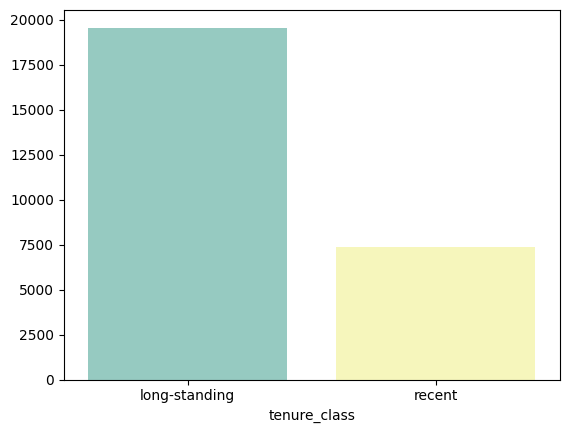

In [51]:
#Are the clients new or long-standing? long-standing -> clients for more than 6 years 
my_plot_test_group2 = sns.barplot(x=frequency_table_test_group2.index, y=frequency_table_test_group2.values, palette="Set3", 
                       hue=frequency_table_test_group2.index, legend=False)

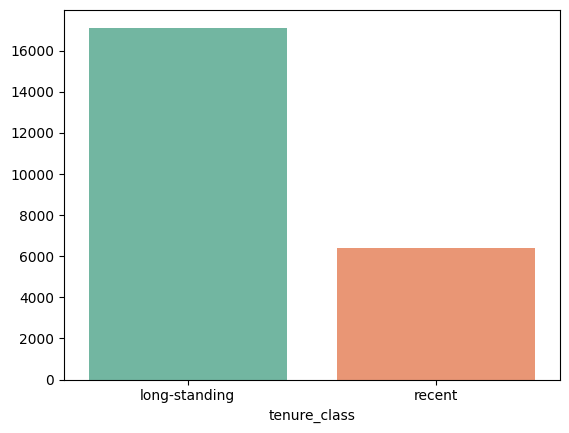

In [52]:
#Are the clients new or long-standing? long-standing -> clients for more than 6 years 
my_plot_control_group2 = sns.barplot(x=frequency_table_control_group2.index, y=frequency_table_control_group2.values, palette="Set2", 
                       hue=frequency_table_control_group2.index, legend=False)

In [53]:
df_id_test_group['id'] = df_id_test_group.apply(lambda row: '_'.join(map(str, [row['client_id'], row['visitor_id'], row['visit_id']])), axis=1)
print(df_id_test_group)

        client_id             visitor_id                      visit_id  \
0             555  402506806_56087378777  637149525_38041617439_716659   
5             647   66758770_53988066587   40369564_40101682850_311847   
10            934  810392784_45004760546    7076463_57954418406_971348   
14           1336  920624746_32603333901  583743392_96265099036_939815   
21           1346   123474046_4204671056   27144337_83739845380_214282   
...           ...                    ...                           ...   
177764    9999150  665127594_52605538620  982803842_91891255980_123078   
177767    9999400  915967319_19082377501  288904166_90826265353_276104   
177772    9999626   52633065_71189986073  182723364_27031318473_880901   
177774    9999729  604429154_69247391147   99583652_41711450505_426179   
177785    9999832  145538019_54444341400  472154369_16714624241_585315   

       process_step            date_time Variation  clnt_tenure_yr  \
0           confirm  2017-04-15 13:00:34 

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/2707500526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_test_group['id'] = df_id_test_group.apply(lambda row: '_'.join(map(str, [row['client_id'], row['visitor_id'], row['visit_id']])), axis=1)


In [54]:
df_id_control_group['id'] = df_id_control_group.apply(lambda row: '_'.join(map(str, [row['client_id'], row['visitor_id'], row['visit_id']])), axis=1)
print(df_id_control_group)

        client_id             visitor_id                      visit_id  \
0            1028   42237450_62128060588  557292053_87239438319_391157   
9            1104  194240915_18158000533  543158812_46395476577_767725   
11           1186  446844663_31615102958  507052512_11309370126_442139   
15           1195  766842522_69992551638  393817425_39015278493_996341   
20           1197  753759429_54481946928   71862471_21202285428_848395   
...           ...                    ...                           ...   
143365    9997125  435478449_41974372268  983995660_11938398128_321832   
143370    9997391   494669706_3354361161   84654768_90613632047_633963   
143378    9997470  395791369_55562604618   761490147_96352537762_21814   
143395    9998346  292425655_16607136645  189177304_69869411700_783154   
143407    9998921  960034051_85687824805    378424178_59565976155_8051   

       process_step            date_time Variation  clnt_tenure_yr  \
0             start  2017-04-08 18:51:28 

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/2941927402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_id_control_group['id'] = df_id_control_group.apply(lambda row: '_'.join(map(str, [row['client_id'], row['visitor_id'], row['visit_id']])), axis=1)


In [55]:
# Performance Metrics:
# Completion Rate

total_test_clients = len(test_group_sorted)
confirm_test_clients = len(test_group_sorted[test_group_sorted['process_step'] == 'confirm'])
confirm_test_rate = confirm_test_clients / total_test_clients
print("Rate of clients from the test group that reached the step 'confirm': {:.2%}".format(confirm_test_rate))

total_control_clients = len(control_group_sorted)
confirm_control_clients = len(control_group_sorted[control_group_sorted['process_step'] == 'confirm'])
confirm_control_rate = confirm_control_clients / total_control_clients
print("Rate of clients from the control group that reached the step 'confirm': {:.2%}".format(confirm_control_rate))

Rate of clients from the test group that reached the step 'confirm': 14.46%
Rate of clients from the control group that reached the step 'confirm': 12.20%


In [56]:
test_group_sorted['id'] = test_group_sorted.apply(lambda row: '_'.join(map(str, [row['client_id'], row['visitor_id'], row['visit_id']])), 
                                                  axis=1)
print(test_group_sorted)

        client_id             visitor_id                      visit_id  \
0             555  402506806_56087378777  637149525_38041617439_716659   
1             555  402506806_56087378777  637149525_38041617439_716659   
2             555  402506806_56087378777  637149525_38041617439_716659   
3             555  402506806_56087378777  637149525_38041617439_716659   
4             555  402506806_56087378777  637149525_38041617439_716659   
...           ...                    ...                           ...   
177782    9999729  843385170_36953471821   493310979_9209676464_421146   
177783    9999729  843385170_36953471821   493310979_9209676464_421146   
177784    9999729  843385170_36953471821   493310979_9209676464_421146   
177785    9999832  145538019_54444341400  472154369_16714624241_585315   
177786    9999832  145538019_54444341400  472154369_16714624241_585315   

       process_step            date_time Variation  clnt_tenure_yr  \
0           confirm  2017-04-15 13:00:34 

In [57]:
control_group_sorted['id'] = control_group_sorted.apply(lambda row: '_'.join(map(str, [row['client_id'], row['visitor_id'], row['visit_id']])), 
                                                        axis=1)
print(control_group_sorted)

        client_id             visitor_id                      visit_id  \
0            1028   42237450_62128060588  557292053_87239438319_391157   
1            1028   42237450_62128060588  557292053_87239438319_391157   
2            1028   42237450_62128060588  557292053_87239438319_391157   
3            1028   42237450_62128060588  557292053_87239438319_391157   
4            1028   42237450_62128060588  557292053_87239438319_391157   
...           ...                    ...                           ...   
143403    9998346  292425655_16607136645  189177304_69869411700_783154   
143404    9998346  292425655_16607136645  189177304_69869411700_783154   
143405    9998346  292425655_16607136645  189177304_69869411700_783154   
143406    9998346  292425655_16607136645  189177304_69869411700_783154   
143407    9998921  960034051_85687824805    378424178_59565976155_8051   

       process_step            date_time Variation  clnt_tenure_yr  \
0             start  2017-04-08 18:51:28 

In [60]:
# Dropping multiple starts and confirms

test_group_filtered = test_group_sorted.groupby('client_id').apply(lambda x: x.drop_duplicates('process_step', keep='last'))
test_group_filtered.reset_index(drop=True, inplace=True)

control_group_filtered = control_group_sorted.groupby('client_id').apply(lambda x: x.drop_duplicates('process_step', keep='last'))
control_group_filtered.reset_index(drop=True, inplace=True)

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/103934727.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_group_filtered = test_group_sorted.groupby('client_id').apply(lambda x: x.drop_duplicates('process_step', keep='last'))
/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/103934727.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  control_group_filtered = contro

In [76]:
# Performance Metrics:
# Time Spent on Each Step

def calculate_time_spent(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.sort_values(by=['client_id', 'timestamp'], inplace=True)
    df['time_spent'] = df.groupby('client_id')['timestamp'].diff().fillna(pd.Timedelta(seconds=0))
    return df

test_group_filtered.reset_index(drop=True, inplace=True)
control_group_filtered.reset_index(drop=True, inplace=True)

test_group_time_spent = test_group_filtered.groupby('client_id').apply(calculate_time_spent).reset_index(drop=True)
control_group_time_spent = control_group_filtered.groupby('client_id').apply(calculate_time_spent).reset_index(drop=True)

test_group_time_per_step = test_group_time_spent.groupby('process_step')['time_spent'].sum()
control_group_time_per_step = control_group_time_spent.groupby('process_step')['time_spent'].sum()

num_clients_test = test_group_time_spent['client_id'].nunique()
num_clients_control = control_group_time_spent['client_id'].nunique()

average_time_per_step_test = test_group_time_per_step / num_clients_test
average_time_per_step_control = control_group_time_per_step / num_clients_control

print("Average Time Spent on Each Step for the Test Group:")
print(average_time_per_step_test)

print("\nAverage Time Spent on Each Step for the Control Group:")
print(average_time_per_step_control)

/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/565091035.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_group_time_spent = test_group_filtered.groupby('client_id').apply(calculate_time_spent).reset_index(drop=True)


Average Time Spent on Each Step for the Test Group:
process_step
confirm   0 days 19:34:53.638185008
step_1    0 days 02:44:01.880115885
step_2    0 days 07:31:49.593544701
step_3    0 days 06:09:36.400171379
Name: time_spent, dtype: timedelta64[ns]

Average Time Spent on Each Step for the Control Group:
process_step
confirm   0 days 17:49:26.247813843
step_1    0 days 05:22:52.422014722
step_2    0 days 05:11:26.144261647
step_3    0 days 06:24:35.342720221
Name: time_spent, dtype: timedelta64[ns]


/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/565091035.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  control_group_time_spent = control_group_filtered.groupby('client_id').apply(calculate_time_spent).reset_index(drop=True)


In [77]:
# Performance Metrics:
# Error Rates

test_group_filtered.reset_index(drop=True, inplace=True)
control_group_filtered.reset_index(drop=True, inplace=True)

test_group_filtered['is_error'] = test_group_filtered['process_step'].lt(test_group_filtered.groupby(test_group_filtered.index)['process_step'].shift().fillna(''))
test_error_rate = (test_group_filtered.groupby(test_group_filtered.index)['is_error'].sum() > 0).mean()

control_group_filtered['is_error'] = control_group_filtered['process_step'].lt(control_group_filtered.groupby(control_group_filtered.index)['process_step'].shift().fillna(''))
control_error_rate = (control_group_filtered.groupby(control_group_filtered.index)['is_error'].sum() > 0).mean()

print("Error Rate for the test group:", test_error_rate)
print("Error Rate for the control group:", control_error_rate)

Error Rate for the test group: 0.0
Error Rate for the control group: 0.0


/var/folders/m4/f8dr8zj14vzfrxjhfypvc0400000gn/T/ipykernel_36246/1500374403.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_group_filtered['is_error'] = control_group_filtered['process_step'].lt(control_group_filtered.groupby(control_group_filtered.index)['process_step'].shift().fillna(''))


In [ ]:
# Conclusion
# Based on the chosen KPIs, the new design does not performance that better compared to the old one. 
# The completion rate is only 2.26% higher, the time spent on each step is a bit higher, with the exception from the start until spet 1

In [ ]:
# Null hypothesis: There is no difference in completion rates between the test and control groups
# Alternative hypothesis: There is a difference in completion rates between the test and control groups

In [84]:
from statsmodels.stats.proportion import proportions_ztest

test_confirm_unique_ids = test_group_filtered[test_group_filtered['process_step'] == 'confirm']['client_id'].nunique()
control_confirm_unique_ids = control_group_filtered[control_group_filtered['process_step'] == 'confirm']['client_id'].nunique()

test_total_unique_ids = test_group_filtered['client_id'].nunique()
control_total_unique_ids = control_group_filtered['client_id'].nunique()

test_completion_rate_unique = test_confirm_unique_ids / test_total_unique_ids
control_completion_rate_unique = control_confirm_unique_ids / control_total_unique_ids

print("Completion Rate for the Test Group:", test_completion_rate_unique)
print("Completion Rate for the Control Group:", control_completion_rate_unique)

count = np.array([test_group_filtered['process_step'].eq('confirm').sum(), control_group_filtered['process_step'].eq('confirm').sum()])

nobs = np.array([len(test_group_filtered), len(control_group_filtered)])

z_stat, p_value = proportions_ztest(count, nobs)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference in completion rates.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in completion rates.")

Completion Rate for the Test Group: 0.7623128085853021
Completion Rate for the Control Group: 0.7622153055679067
Fail to reject the null hypothesis. There is no statistically significant difference in completion rates.


In [ ]:
# Null hypothesis: Completion rate increase is less than 5%
# Alternative hypothesis: Completion rate increase is greater than or equal to 5%

In [79]:
test_completion_rate = (test_group_filtered['process_step'] == 'confirm').mean()
control_completion_rate = (control_group_filtered['process_step'] == 'confirm').mean()

observed_completion_rate_increase = test_completion_rate - control_completion_rate

threshold = 0.05  
if observed_completion_rate_increase >= threshold:
    print("Observed completion rate increase meets or exceeds the 5% threshold.")
else:
    print("Observed completion rate increase does not meet the 5% threshold. The new design may not be cost-effective.")

Observed completion rate increase does not meet the 5% threshold. The new design may not be cost-effective.


In [80]:
from scipy.stats import ttest_ind

test_age = test_group_filtered['clnt_age']  
control_age = control_group_filtered['clnt_age']

t_stat, p_value = ttest_ind(test_age, control_age)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The average age of clients engaging with the new process is different from the old process.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that the average age differs between the two processes.")

Reject the null hypothesis. The average age of clients engaging with the new process is different from the old process.


In [81]:
avg_test_age = test_group_filtered['clnt_age'].mean()
avg_control_age = control_group_filtered['clnt_age'].mean()

avg_test_age, avg_control_age

(46.989514348785875, 47.186901471368344)

In [82]:
test_tenure = test_group_filtered['clnt_tenure_yr']  
control_tenure = control_group_filtered['clnt_tenure_yr']

t_stat, p_value = ttest_ind(test_tenure, control_tenure)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The average client tenure of those engaging with the new process is different from the old process.")
else:
    print("Fail to reject the null hypothesis. There is no evidence to suggest that the average client tenure differs between the two processes.")

Reject the null hypothesis. The average client tenure of those engaging with the new process is different from the old process.


In [83]:
from scipy.stats import chi2_contingency

contingency_table_test = pd.crosstab(test_group_filtered['gendr'], test_group_filtered['Variation'])

chi2_stat_test, p_val_test, dof_test, expected_test = chi2_contingency(contingency_table_test)

contingency_table_control = pd.crosstab(control_group_filtered['gendr'], control_group_filtered['Variation'])

chi2_stat_control, p_val_control, dof_control, expected_control = chi2_contingency(contingency_table_control)

alpha = 0.05

if p_val_test < alpha:
    print("Reject the null hypothesis for the test group. There is a significant association between gender and process variation.")
else:
    print("Fail to reject the null hypothesis for the test group. There is no significant association between gender and process variation.")

if p_val_control < alpha:
    print("Reject the null hypothesis for the control group. There is a significant association between gender and process variation.")
else:
    print("Fail to reject the null hypothesis for the control group. There is no significant association between gender and process variation.")

Fail to reject the null hypothesis for the test group. There is no significant association between gender and process variation.
Fail to reject the null hypothesis for the control group. There is no significant association between gender and process variation.


In [ ]:
test_group_filtered.to_csv('../data/cleaned/test_group_filtered.csv')

In [ ]:
control_group_filtered.to_csv('../data/cleaned/control_group_filtered.csv')